In [86]:
# 1. Importing packages & Providing Explanations

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creating Bins For Ranges And Cutoffs 
bins = range(0,51,10)
labels = [f'{i+1}-{i+10}' for i in bins[:-1]]

df['condition'] = pd.cut(df['condition_2'], bins=bins, labels=labels, right=True, include_lowest=True)





# Seaborn Styling 
sns.set_theme(style = "whitegrid")

# Showing more columns 
pd.set_option('display.max_columns', 50)



# 2. Load and Begin Inspecting Data 
# Task: I need to get the variables from Kaggle 

#Loading the CSV (Comma Separated Values File) into the df--> Dataframe
df = pd.read_csv("car_prices_new.csv")

# To show all column names
print(df.columns.tolist())

# Looking into the first 5 rows of data --> Making sure there are no blanks, errors, etc in cells
display(df.head())

# Getting info on datatypes and missing values (if there are any) 
df.info()

"""
What To Look For:
    Column names: 
        Year
        Make
        Model
        Vin number
        Odometer
        Color
        Selling Price 
        Sale Date (could look into the cars sold around christmas or types of cars sold in different seasons)
        
    Data Types: 
        Integer (prices, years, etc)
        Strings(Manufacturers name, make, and models, etc) 
        Floating point numbers(condition)
        
    Null Values: Missing Values 

"""



['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate', 'condition_2']


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_2
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),50.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),50.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),45.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),41.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),43.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
 16  condition_2   547017 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usage

'\nWhat To Look For:\n    Column names: \n        Year\n        Make\n        Model\n        Vin number\n        Odometer\n        Color\n        Selling Price \n        Sale Date (could look into the cars sold around christmas or types of cars sold in different seasons)\n\n    Data Types: \n        Integer (prices, years, etc)\n        Strings(Manufacturers name, make, and models, etc) \n        Floating point numbers(condition)\n\n    Null Values: Missing Values \n\n'

In [87]:
# Cleaning Key columns + Conversion of Strings with formatting to numerical values 

In [88]:
# A. Code to clean 'selling_price' --> numeric 'price'
df['price'] = (
    df['sellingprice']
    .astype(str)
    .str.replace(r'[\$,]', '', regex = True)
    .pipe(pd.to_numeric, errors='coerce')
)


# B. Code to clean 'condition' --> numeric value + Verify it 
df['condition'] = pd.to_numeric(df['condition_2'], errors = 'coerce')


# C. Drop Rows in either condition or price that have missing values 
# df = df.dropna(subset=['price' , 'condition'])

# D. Confirm that everything is cleaned 
display(df[['sellingprice', 'price', 'condition']].head())
df[['price', 'condition']].describe()




,sellingprice,price,condition
0,21500.0,21500.0,50.0
1,21500.0,21500.0,50.0
2,30000.0,30000.0,45.0
3,27750.0,27750.0,41.0
4,67000.0,67000.0,43.0


,price,condition
count,558825.000000,547017.000000
mean,13611.358810,34.245122
std,9749.501628,9.494388
min,1.000000,10.000000
25%,6900.000000,27.000000
50%,12100.000000,36.000000
75%,18200.000000,42.000000
max,230000.000000,50.000000


In [89]:
"""
Questions: 
    1. Did I lose any rows when dropping the nulls? (Original value shows was 16 columns and 558k entries)
    2. What are the min/max values of condition ? 
    3. Does price look cleaner? Are there any missing values still? 

Conclusions (Descriptive Statistics) : 
    a. Condition is out of 50.0 scale 
    b. There is a very LOW outlier where a car was a 1.0 condition and sold for $1.00
    c. The average car is selling for $13,700 (give or take)
    d. Highest outlier, is a car sold for $230K and in a 49.0/ 50.0 condition 
"""

'\nQuestions: \n    1. Did I lose any rows when dropping the nulls? (Original value shows was 16 columns and 558k entries)\n    2. What are the min/max values of condition ? \n    3. Does price look cleaner? Are there any missing values still? \n\nConclusions (Descriptive Statistics) : \n    a. Condition is out of 50.0 scale \n    b. There is a very LOW outlier where a car was a 1.0 condition and sold for $1.00\n    c. The average car is selling for $13,700 (give or take)\n    d. Highest outlier, is a car sold for $230K and in a 49.0/ 50.0 condition \n'

In [90]:
# Analyzing how price changes in accordance with condition 

In [91]:
# Price by Condition

# In doing so we will compute: 
    # a. Count Of cars
    # b. Mean selling cars --> Their prices, conditions, makes and models
    # c. Standard Deviation Of Price

grp = df.groupby('condition')['price'].mean().reset_index()
summary = pd.DataFrame({
    'count': grp.count(),
    'mean': grp.mean(),
    'std_dev': grp.std()
}).sort_index()


summary

# Come back to edit and see if there is correlation between the higher condition --> High price to certain makes and models
# Think about what defines these parameters such as condition --> The car dealership or the driver? 

"""
Questions For Follow Up: 
    1. How many vehicles fall into each condition bucket 
    2. Does the mean price increase as condition improves? 
    3. Which buckets have a high variability (larger std. dev)? Are these cars low or higher-end 
"""



'\nQuestions For Follow Up: \n    1. How many vehicles fall into each condition bucket \n    2. Does the mean price increase as condition improves? \n    3. Which buckets have a high variability (larger std. dev)? Are these cars low or higher-end \n'

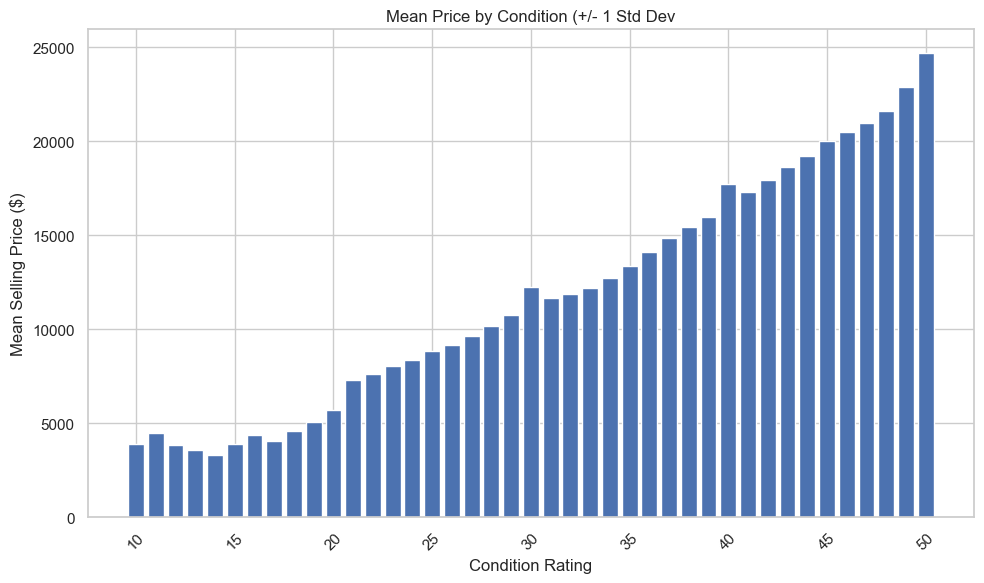

In [92]:
# Create a plot to visualize the Standard Deviation (Variablility analysis) 

# Mean price --> +/- 1 Standard Deviation 

plt.figure(figsize = (10,6))
plt.bar(grp['condition'], grp['price'])
# plt.errorbar(
   # x = summary.index, 
   # y = summary['mean'],
   # yerr = summary['std_dev'],
   # fmt = 'o-', capsize = 5, linewidth = 2
#)
plt.xlabel('Condition Rating')
plt.ylabel('Mean Selling Price ($)')
plt.title('Mean Price by Condition (+/- 1 Std Dev')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


In [93]:
# My Thoughts: 
    # That stint after condition 5.0 and up to around 18.0 shows something funky is going on there
    # There is a huge decline/ drop off in mean value from the above 

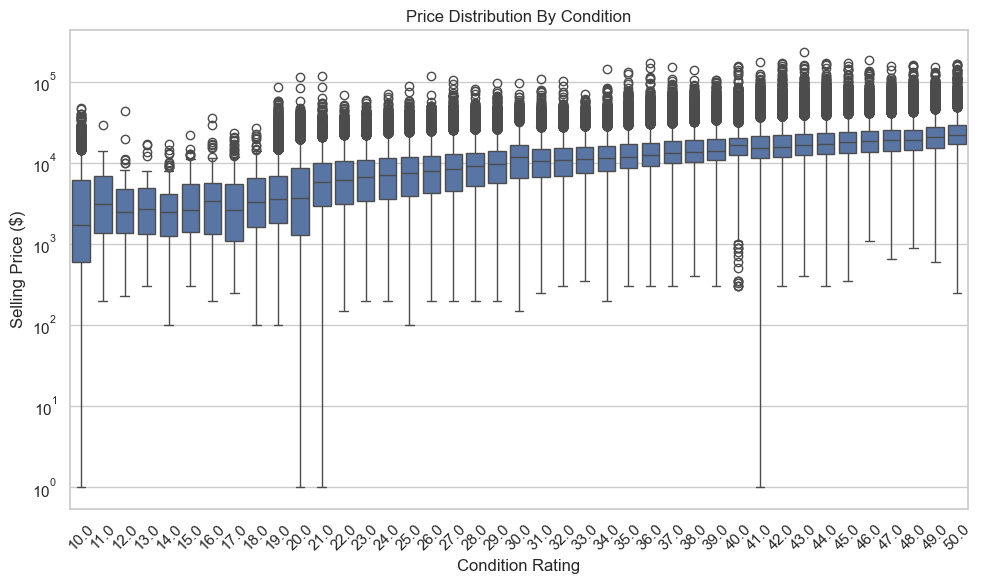

In [103]:
# Boxplot of Full Price Distribution 

plt.figure(figsize = (10,6))
sns.boxplot(x = 'condition', y='price', data =df)
plt.xlabel('Condition Rating')
plt.ylabel('Selling Price ($)')
plt.title('Price Distribution By Condition')
plt.xticks(rotation=45)
plt.yscale('log') # optional: This can be used if the price range is too wide
plt.tight_layout()
plt.show()


In [104]:
# Questions to Think About 
    # Outliers, what conditions do they fall under? 
    # 1st quartile for a few are pretty low, even as condition increases 
    # Look into log scale for seaborn plotting in textbook
    # See if price conditions can be "aggregated" to 10, 20, 30, 40, etc. instead of listing ALL conditions 


In [105]:
from sklearn.model_selection import train_test_split

# 1. Pick your feature(s) and target
X = df[['condition']].values      # shape (n_samples, 1)
y = df['price'].values            # shape (n_samples,)

# 2. Do the train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train (or load) your model and predict
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [97]:
# Checking The Shapes Of My Arrays 

print(" X_test shape:", X_test.shape) #Error is sayign that my X-test variable is not defined !
print(" y_test shape:", y_test.shape)
print(" y_pred shape:", y_pred.shape)

"""
Output: 
 X_test shape: (109401, 1)
 y_test shape: (109401, 1)
 y_pred shape: (109401, 1)

 this means that each of the above are one dimensional 

"""


 X_test shape: (111768, 1)
 y_test shape: (111768,)
 y_pred shape: (109401,)


'\nOutput: \n X_test shape: (109401, 1)\n y_test shape: (109401, 1)\n y_pred shape: (109401, 1)\n\n this means that each of the above are one dimensional \n\n'

In [98]:
# Simple Linear Fit --> Linear Regression 


IndexError: index 110598 is out of bounds for axis 0 with size 109401

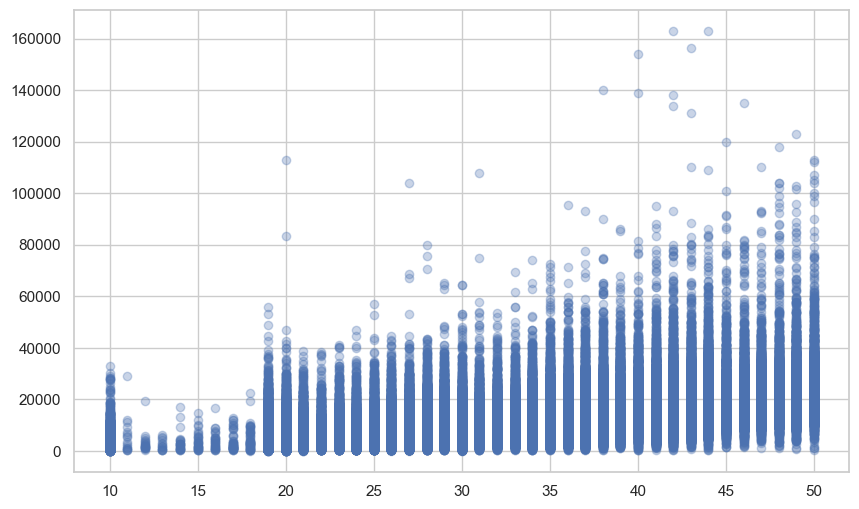

In [99]:
# 1) Flatten all your arrays to 1-D
conditions = X_test[:, 0]        # shape (n_samples,) # Im receiving the same error here, that my variable X_test is not defined
actuals    = y_test.ravel()      # shape (n_samples,)
preds      = y_pred.ravel()      # shape (n_samples,)

# 2) Scatter actual vs. condition
plt.figure(figsize=(10,6))
plt.scatter(conditions, actuals, alpha=0.3, label="Actual")

# 3) Plot the regression‐line style prediction
order = np.argsort(conditions)   # indices that sort the conditions
plt.plot(conditions[order], preds[order], color="red", label="Predicted")

# 4) Labels & legend
plt.xlabel("Condition Rating")
plt.ylabel("Selling Price")
plt.title("Price vs. Condition: Actual & Predicted")
plt.legend()
plt.tight_layout()
plt.show()

In [100]:
# figure out how to address the gap in the condtion between 5 to 11 and then these low numbers between 11 to 18.0 

In [101]:
# (Re)create X, y as you did before:
X = df[['condition']].values
y = df['price'].values

# Split (including idx_test if you want it)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# (Re)fit and predict if not already done in this session
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Build comparison DataFrame
df_compare = pd.DataFrame({
    "Actual":    y_test.ravel(),
    "Predicted": y_pred.ravel()
})
df_compare["Residual"] = df_compare["Actual"] - df_compare["Predicted"]

# Display first 10 rows
display(df_compare.head(10))

# Compute & print metrics
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MAE : ${mae:,.2f}")
print(f"MSE : ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²  : {r2:.3f}")

# Plot residual histogram
plt.figure(figsize=(6,4))
sns.histplot(df_compare["Residual"], bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Actual − Predicted")
plt.show()

# Plot residual vs. condition
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test[:,0], y=df_compare["Residual"], alpha=0.3)
plt.title("Residual vs. Condition")
plt.xlabel("Condition Rating")
plt.ylabel("Residual")
plt.show()


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values